# FrozenLake Q-Learning

In [1]:
import numpy as np
import random
import gym
from gym import wrappers
import matplotlib.pyplot as plt

In [2]:
env = gym.make('FrozenLake-v0')
env = wrappers.Monitor(env, 'FrozenLake-record',force=True)

[2017-08-25 16:18:34,065] Making new env: FrozenLake-v0


## Config

In [14]:
# Env variables
nb_states = 16
nb_actions = 4

# Training tuning
e = 1.0
e_decay = 0.999
y = .95
lr = .8

# Training loop
nb_max_episodes = 15000
episode_count = 0
total_steps = 0
test_freq = 50
log_freq = 500

## Training

### Init Q-Table

In [16]:
Qout = np.zeros((nb_states, nb_actions))

### Test accurracy

In [20]:
def test_accurracy():
    test_batch_size = 200
    c = 0
    nb_success = 0.0
    while c < test_batch_size:
        is_gameover = False
        state = env.reset()
        while not is_gameover:
            action = np.argmax(Qout[state,:])
            next_state, reward, is_gameover, _ = env.step(action)
            state = next_state
        if reward == 1:
            nb_success += 1
        c += 1
    return nb_success / c

### Training Loop

In [18]:
accurracies = []
rewards = []
while episode_count < nb_max_episodes:
    state = env.reset()
    is_gameover = False
    reward_tot = 0
    episode_step = 0
    while not is_gameover:
        episode_step += 1
        
        if random.random() < e:
            action = random.randint(0, nb_actions-1)
        else:
            action = np.argmax(Qout[state,:])

        next_state, reward, is_gameover, _ = env.step(action)
        
        Qout[state, action] += lr * (reward + y*np.max(Qout[next_state,:]) - Qout[state, action])
        
        reward_tot += reward
        total_steps += 1
        state = next_state
        
        if is_gameover:
            break
            
    e *= e_decay
    
    if episode_count % test_freq == 0 and episode_count != 0:
        accurr, mean_reward = test_accurracy()
        accurracies.append(accurr)
        
        if episode_count % log_freq == 0:
            print('step: %s, episode: %s, accurracy: %s. random move probability: %s' % (total_steps, episode_count, accurr, e))
        
    episode_count += 1
    rewards.append(reward_tot)
env.close()

step: 4223, episode: 500, accurracy: 0.075. keep move probability: 0.6057725659163237
step: 9192, episode: 1000, accurracy: 0.555. keep move probability: 0.36732772934619257
step: 15280, episode: 1500, accurracy: 0.0. keep move probability: 0.22273980093919937
step: 23713, episode: 2000, accurracy: 0.545. keep move probability: 0.13506472547210188
step: 33529, episode: 2500, accurracy: 0.28. keep move probability: 0.08190040571973876
step: 45574, episode: 3000, accurracy: 0.445. keep move probability: 0.049662681604038215
step: 60402, episode: 3500, accurracy: 0.525. keep move probability: 0.030114404470033673
step: 74397, episode: 4000, accurracy: 0.7. keep move probability: 0.018260740807661956
step: 92734, episode: 4500, accurracy: 0.715. keep move probability: 0.011072928743333644
step: 113581, episode: 5000, accurracy: 0.725. keep move probability: 0.006714390847905742
step: 134886, episode: 5500, accurracy: 0.7. keep move probability: 0.004071465237738676
step: 156500, episode: 6

### Metrics

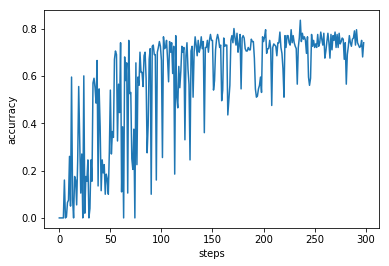

In [19]:
import matplotlib.pyplot as plt
plt.plot(accurracies)
plt.xlabel('steps')
plt.ylabel('accurracy')
plt.show()

### Upload results on Gym OpenAI

In [ ]:
import gym
gym.upload('FrozenLake-records', api_key='your_key')